In [1]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
data= pd.read_excel("newp.xlsx")
data[0:]

,Product_Name,Brand,Price,Available Quantity,Base Price,Storage
0,TRADER JOE'S® Feine Blattsalate von ALDI Nord,TRADER JOE'S®,1.29,125-g-Beutel,100 g = 1.03,1
1,KITCHENETTE® Fertiggerichte von ALDI Nord,KITCHENETTE®,1.69,400-g-Packung,kg = 4.23,1
2,LINDTMANNS® Frisches Fertiggericht von ALDI Nord,LINDTMANN'S®,2.99,Schale,kg = 6.64/5.98/5.16,2
3,Güldenhof Hähnchenbrust Filetstücke von ALDI Nord,GÜLDENHOF®,1.59,150-g-Packung,100 g = 1.06,4
4,LINDTMANNS® Hühner-Frikassee von ALDI Nord,LINDTMANN'S®,1.39,450-g-Packung,kg = 3.09,3
5,ALL SEASONS® Multipack Gemüse von ALDI Nord,ALL SEASONS®,2.59,6x150-g-Pckg.,kg = 2.88,2
6,OFTERDINGER® Orientalischer Salat von ALDI Nord,OFTERDINGER®,0.99,200-g-Packung,100 g = 0.50,1
7,POTTKIEKER® Original Metzgereintopf von ALDI Nord,POTTKIEKER®,2.39,900-g-Rolle,kg = 2.66,3
8,MAMA MANCINI® Pasta von ALDI Nord,MAMA MANCINI®,1.25,400-g-Packung,kg = 3.13,3
9,MAMA MANCINI® Pizza al Gusto von ALDI Nord,MAMA MANCINI®,1.59,Packung,NaN,1


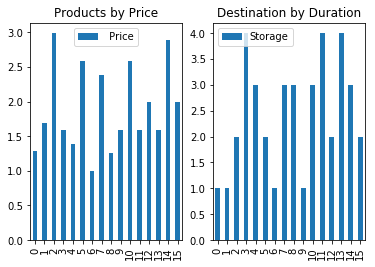

In [3]:
fig, axs = plt.subplots(1,2)
my_plot = data[['Product_Name', ' Price']].plot(kind='bar', title="Products by Price", ax=axs[0])
my_plot = data[['Product_Name', 'Storage']].plot(kind='bar', title="Destination by Duration", ax=axs[1])

In [4]:
prob = pulp.LpProblem('FinancingMonthlyBudget', pulp.LpMinimize)

In [5]:
decision_variables = []
for rownum, row in data.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound= None, cat = 'Integer')
    decision_variables.append(variable)

print("Total number of Decision Varibales:" + str(len(decision_variables)))
print("Array of Decision Variables:" + str(decision_variables))

Total number of Decision Varibales:16
Array of Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15]


In [6]:
total_money = ""
for rownum, row in data.iterrows():
    for i, money in enumerate(decision_variables):
        if rownum == i:
            formula = row[' Price']*money
            total_money += formula
prob += total_money
print("Function to be optimized : " + str(total_money))

Function to be optimized : 1.29*x0 + 1.69*x1 + 2.59*x10 + 1.59*x11 + 1.99*x12 + 1.59*x13 + 2.89*x14 + 1.99*x15 + 2.99*x2 + 1.59*x3 + 1.39*x4 + 2.59*x5 + 0.99*x6 + 2.39*x7 + 1.25*x8 + 1.59*x9


In [7]:
aval_space = 10
total_packages = ""
for rownum, row in data.iterrows():
    for i, place in enumerate(decision_variables):
        if rownum == i:
            formula = row['Storage']*place
            total_packages += formula
prob += (total_packages==aval_space)
print("Constraint:" + str(total_packages))

Constraint:x0 + x1 + 3*x10 + 4*x11 + 2*x12 + 4*x13 + 3*x14 + 2*x15 + 2*x2 + 4*x3 + 3*x4 + 2*x5 + x6 + 3*x7 + 3*x8 + x9


In [8]:
print(prob)
prob.writeLP("FinancingMonthlyBudget.lp")

FinancingMonthlyBudget:
MINIMIZE
1.29*x0 + 1.69*x1 + 2.59*x10 + 1.59*x11 + 1.99*x12 + 1.59*x13 + 2.89*x14 + 1.99*x15 + 2.99*x2 + 1.59*x3 + 1.39*x4 + 2.59*x5 + 0.99*x6 + 2.39*x7 + 1.25*x8 + 1.59*x9 + 0.0
SUBJECT TO
_C1: x0 + x1 + 3 x10 + 4 x11 + 2 x12 + 4 x13 + 3 x14 + 2 x15 + 2 x2 + 4 x3
 + 3 x4 + 2 x5 + x6 + 3 x7 + 3 x8 + x9 = 10

VARIABLES
0 <= x0 Integer
0 <= x1 Integer
0 <= x10 Integer
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x2 Integer
0 <= x3 Integer
0 <= x4 Integer
0 <= x5 Integer
0 <= x6 Integer
0 <= x7 Integer
0 <= x8 Integer
0 <= x9 Integer



In [9]:
optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the Problem:", value(prob.objective))
print("Individual decision_variables:")
for v in prob.variables():
    print(v.name, "=", v.value)

Status: Optimal
Optimal Solution to the Problem: 4.09
Individual decision_variables:
x0 = <bound method LpVariable.value of x0>
x1 = <bound method LpVariable.value of x1>
x10 = <bound method LpVariable.value of x10>
x11 = <bound method LpVariable.value of x11>
x12 = <bound method LpVariable.value of x12>
x13 = <bound method LpVariable.value of x13>
x14 = <bound method LpVariable.value of x14>
x15 = <bound method LpVariable.value of x15>
x2 = <bound method LpVariable.value of x2>
x3 = <bound method LpVariable.value of x3>
x4 = <bound method LpVariable.value of x4>
x5 = <bound method LpVariable.value of x5>
x6 = <bound method LpVariable.value of x6>
x7 = <bound method LpVariable.value of x7>
x8 = <bound method LpVariable.value of x8>
x9 = <bound method LpVariable.value of x9>


In [10]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')


for rownum, row in data.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            data.loc[rownum, 'decision'] = results_row['value']
data[0:]

,Product_Name,Brand,Price,Available Quantity,Base Price,Storage,decision
0,TRADER JOE'S® Feine Blattsalate von ALDI Nord,TRADER JOE'S®,1.29,125-g-Beutel,100 g = 1.03,1,0.0
1,KITCHENETTE® Fertiggerichte von ALDI Nord,KITCHENETTE®,1.69,400-g-Packung,kg = 4.23,1,0.0
2,LINDTMANNS® Frisches Fertiggericht von ALDI Nord,LINDTMANN'S®,2.99,Schale,kg = 6.64/5.98/5.16,2,0.0
3,Güldenhof Hähnchenbrust Filetstücke von ALDI Nord,GÜLDENHOF®,1.59,150-g-Packung,100 g = 1.06,4,0.0
4,LINDTMANNS® Hühner-Frikassee von ALDI Nord,LINDTMANN'S®,1.39,450-g-Packung,kg = 3.09,3,0.0
5,ALL SEASONS® Multipack Gemüse von ALDI Nord,ALL SEASONS®,2.59,6x150-g-Pckg.,kg = 2.88,2,0.0
6,OFTERDINGER® Orientalischer Salat von ALDI Nord,OFTERDINGER®,0.99,200-g-Packung,100 g = 0.50,1,0.0
7,POTTKIEKER® Original Metzgereintopf von ALDI Nord,POTTKIEKER®,2.39,900-g-Rolle,kg = 2.66,3,0.0
8,MAMA MANCINI® Pasta von ALDI Nord,MAMA MANCINI®,1.25,400-g-Packung,kg = 3.13,3,2.0
9,MAMA MANCINI® Pizza al Gusto von ALDI Nord,MAMA MANCINI®,1.59,Packung,NaN,1,0.0
